# PROYECTO FINAL – DEEP LEARNING ANN CLASIFICACIÓN BINARIA 
# PREVISIÓN LLUVIA 

# 1.Importación librerías

1) Realice la importación de las librerías básicas de cálculo y visualización así como el dataset en un dataframe df: 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# 2.Importación fuente de datos

In [30]:
df = pd.read_csv("./weatherAUS.csv")

In [31]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 3.Análisis de Datos (EDA) + Preprocesado

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## 3.1 Limpieza inicial

2) Realice la limpieza del dataframe teniendo en cuenta eliminar aquéllas columnas que superan un 10% de valores erróneos, posteriormente elimine todos aquellos registros que contienen algún valor NaN: 

In [33]:
df_nan = df.isnull().sum() #Verificamos cuantos valores nulos hay en cada columna del dataframe y se guarda
df_nan

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [34]:
perc_to_eliminate = 0.1 #Porcentaje de eliminación 10%
df_no_nan = df_nan[df_nan < len(df) * perc_to_eliminate] #Variables con menos 10% nulos
df = df[df_no_nan.index] 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [35]:
df.dropna(inplace=True) #Eliminar filas con valores nulos
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

3) Realice la visualización de la variable objetivo “RainTomorrow” para ver si el dataset está balanceado, adicionalmente, cree 2 nuevas columnas para reemplazar la columna “RainToday” por “Lluvia Hoy” y “RainTomorrow” por “Predicción Lluvia” de tal manera que las etiquetas “No” / “Yes” pasen a ser “0” / “1”. Por ultimo visualice la correlación entre las variables, ¿cuáles son las variables más correlacionadas con la variable objetivo?

<Axes: xlabel='RainTomorrow', ylabel='count'>

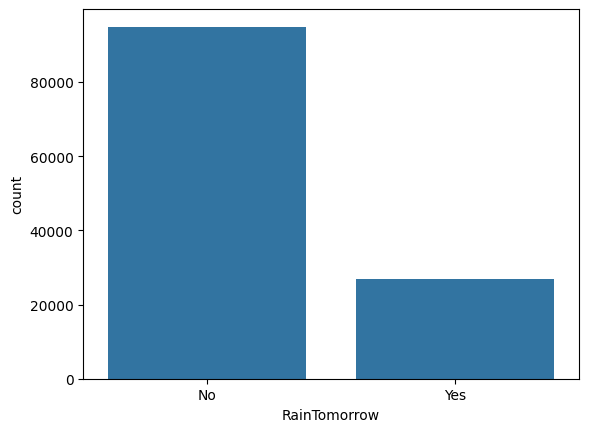

In [36]:
sns.countplot(x="RainTomorrow", data=df) 

La proporción de datos no está equilibrada.

In [37]:
df["Lluvia Hoy"] = np.where(df["RainToday"]=="Yes",1,0)
df["Predicción Lluvia"] = np.where(df["RainTomorrow"]=="Yes",1,0)
df=df.drop(["RainTomorrow","RainToday"],axis=1)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,Lluvia Hoy,Predicción Lluvia
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,0,0


In [38]:
df_corr = df.corr(numeric_only=True)["Predicción Lluvia"].sort_values() #Correlación entre Predicción Lluvia y el resto de variables.
df_corr

Temp3pm             -0.199926
MaxTemp             -0.166291
Temp9am             -0.035488
MinTemp              0.078922
WindSpeed9am         0.093249
WindSpeed3pm         0.096451
WindGustSpeed        0.235302
Rainfall             0.238865
Humidity9am          0.273326
Lluvia Hoy           0.313567
Humidity3pm          0.455048
Predicción Lluvia    1.000000
Name: Predicción Lluvia, dtype: float64

Las variables más correlacionadas son: Lluvia Hoy y Humidity3am. Humidity9am, Rainfall y WindGustSpeed tienen una correlación menor, pero también relevante. Temp3pm y MaxTemp tienem una correlación negativa albo baja pero que puede llegar a interesar de cara al modelo.

4) Realice la limpieza de columnas que estén poco correladas (por debajo de 0,1 en valor absoluto)

In [39]:
corr_min = 0.1 #Correlación mínima 0.1
df_no_corr = df_corr[df_corr.abs() < corr_min] #Df con las variables con correlación menor a 0.1
df = df.drop(df_no_corr.index, axis=1) #Se modifica el df original
df.head()

,Date,Location,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Temp3pm,Lluvia Hoy,Predicción Lluvia
0,2008-12-01,Albury,22.9,0.6,W,44.0,W,WNW,71.0,22.0,21.8,0,0
1,2008-12-02,Albury,25.1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,24.3,0,0
2,2008-12-03,Albury,25.7,0.0,WSW,46.0,W,WSW,38.0,30.0,23.2,0,0
3,2008-12-04,Albury,28.0,0.0,NE,24.0,SE,E,45.0,16.0,26.5,0,0
4,2008-12-05,Albury,32.3,1.0,W,41.0,ENE,NW,82.0,33.0,29.7,0,0


5) Finalmente en este paso EDA, convierta las variables categóricas con la técnica OneHotEncoder de las variables ['Location','WindGustDir','WindDir9am','WindDir3pm'], las variables de “Lluvia Hoy” y “Predicción Lluvia” ya se han convertido previamente de manera manual:

In [40]:
df = df.drop("Date", axis=1) #Se elimina la columna de la fecha al no ser relevante (?) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121790 entries, 0 to 145458
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Location           121790 non-null  object 
 1   MaxTemp            121790 non-null  float64
 2   Rainfall           121790 non-null  float64
 3   WindGustDir        121790 non-null  object 
 4   WindGustSpeed      121790 non-null  float64
 5   WindDir9am         121790 non-null  object 
 6   WindDir3pm         121790 non-null  object 
 7   Humidity9am        121790 non-null  float64
 8   Humidity3pm        121790 non-null  float64
 9   Temp3pm            121790 non-null  float64
 10  Lluvia Hoy         121790 non-null  int64  
 11  Predicción Lluvia  121790 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 12.1+ MB


In [41]:
oe_style = OneHotEncoder()
cat_col = ['Location','WindGustDir','WindDir9am','WindDir3pm']
oe_results = oe_style.fit_transform(df[cat_col])
encoded_df = pd.DataFrame(oe_results.toarray(), columns=oe_style.get_feature_names_out(cat_col))
df = df.join(encoded_df)
df = df.drop(cat_col, axis=1)
df.isnull().sum()

MaxTemp               0
Rainfall              0
WindGustSpeed         0
Humidity9am           0
Humidity3pm           0
                  ...  
WindDir3pm_SSW    20893
WindDir3pm_SW     20893
WindDir3pm_W      20893
WindDir3pm_WNW    20893
WindDir3pm_WSW    20893
Length: 103, dtype: int64